In [364]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Problem 2

/var/folders/bs/d4qy9fyd0qx3k7_5vtrvzv580000gn/T/ipykernel_6461/4113635233.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


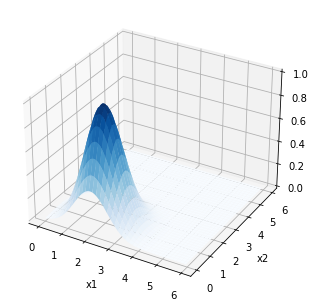

In [418]:
x1 = np.arange(0, 6, 0.05)
x2 = np.arange(0, 6, 0.05)

X1, X2 = np.meshgrid(x1, x2)
y = np.exp(-(X1-2)**2 - (X2-1)**2)

fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
ax.plot_surface(X1, X2, y, cmap = plt.get_cmap('Blues'), edgecolor ='none') 
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(False)
plt.show()

# Problem 3

<Figure size 72x72 with 0 Axes>

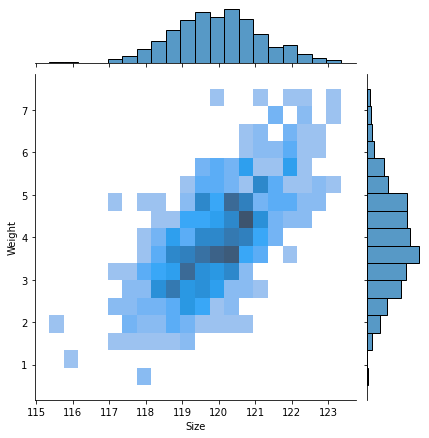

In [427]:
#Parameters to set
mu_S = 120
variance_S = 1.5

mu_W = 4
variance_W = 1.5

rv = multivariate_normal([mu_S, mu_W], 
                         [[variance_S, 1], [1, variance_W]])

# Generating 500 samples out of the distribution
data = rv.rvs(size = 500)

fig = plt.figure(figsize=(1,1))
ax = sns.jointplot(data=data, x=data[:,0], y=data[:,1], kind="hist")
ax.ax_joint.set_xlabel("Size")
ax.ax_joint.set_ylabel("Weight")
plt.show()

Text(0, 0.5, 'Probability')

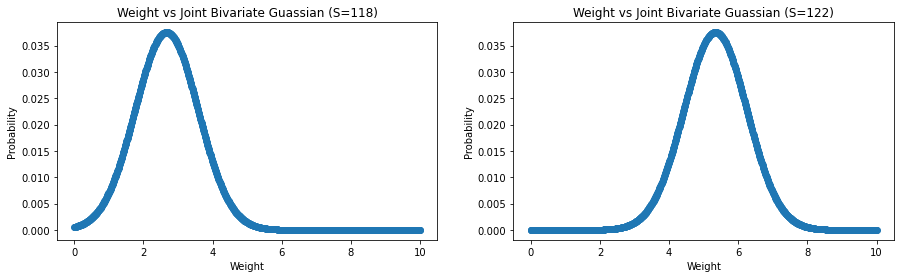

In [410]:
# Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
distr = multivariate_normal([mu_S, mu_W], 
                         [[variance_S, 1], [1, variance_W]])
    
W = np.linspace(0, 10, num=1001)
S = [118]*1001

# Generating the density function
# for each point in the meshgrid
pdf = []
for i in range(W.shape[0]):
    pdf.append(distr.pdf([S[i], W[i]]))

fig, ax =  plt.subplots(1,2, figsize=(15,4))

#Plotting the density function values
ax[0].scatter(W, pdf)
ax[0].set_title(f'Weight vs Joint Bivariate Guassian (S=118)')
ax[0].set_xlabel('Weight')
ax[0].set_ylabel('Probability')


S = [122]*1001
pdf = []
for i in range(W.shape[0]):
    pdf.append(distr.pdf([S[i], W[i]]))
#Plotting the density function values
ax[1].scatter(W, pdf)
ax[1].set_title(f'Weight vs Joint Bivariate Guassian (S=122)')
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('Probability')

In [414]:
def draw_from_T():
    t_hat = 0
    num_packages = np.random.poisson(3, 24)
    for n in num_packages:
        if n == 0:
            T = np.array(0) 
        else:
            rv = multivariate_normal([120,  4], 
                                     [[1.5, 1], [1, 1.5]])

            data = rv.rvs(size = n).reshape(n,-n)
            noise = np.random.normal(0, 5, n)

            T = 60 + 0.6*data[:,1] + 0.2*data[:,0] + noise.reshape(n,-n)[0]
        t_hat += T.sum()
    return(t_hat)

In [415]:
t_hats = []
for i in range(1,1000):
    t = draw_from_T()
    t_hats.append(t)
    
print('Standard Deviation: ', np.std(times))
print('Mean:', np.mean(times))

Standard Deviation:  742.3385429320192
Mean: 6198.449995825522
